# Indice proyecto:
* **0- Datos + EDA Credit failure prediction**
  * Link: https://colab.research.google.com/drive/1OEB_xe0QN__ABY8uueQnofnQszqlZkP2?usp=sharing

* **1-Limpieza Datos y Feature Credit failure prediction**
    * Link:https://colab.research.google.com/drive/1z-CUbk-R5nvjH9H4Dz-1Ti8CUVsvbQsS?usp=sharing
    
**Nota**: Al inicio del proyecto se  guardo el archivo original con nombre *cs-training.csv y cs-test.csv* en local y se continúa trabajando con la copia del archivo llamada *cs-training.csv.*

# Predictor de créditos bancarios
## Business Problem Understanding

- Contexto y objetivo del negocio:

Los bancos desempeñan un papel crucial en las economías de mercado.

Deciden quién puede obtener financiación y en qué condiciones, y pueden tomar decisiones de inversión decisivas.

Para que los mercados y la sociedad funcionen, los particulares y las empresas necesitan acceder al crédito.

Los algoritmos de calificación crediticia, que hacen una estimación de la probabilidad de impago, son el método que utilizan los bancos para determinar si debe concederse o no un préstamo.

Este proyecto requiere que los participantes mejoren el estado del arte de la calificación crediticia, prediciendo la probabilidad de que alguien experimente dificultades financieras en los próximos dos años.

El objetivo de este proyecto es construir un modelo que los prestatarios puedan utilizar para ayudarles a tomar las mejores decisiones financieras.
Se proporcionan datos históricos de 250.000 prestatarios


- Problema: Predecir si un cliente incumplirá su préstamo (“default”) en los próximos dos años.

- Impacto: Reducir pérdidas por morosidad, ajustar políticas de crédito, mejorar selección de clientes.

- Stakeholders:

  - Dirección de Riesgos

  - Equipo de Crédito y Cobranza

  - Dirección Financiera

- Preguntas clave:

  - ¿Qué coste tiene un falso negativo (no detectar a un moroso)?

  - ¿Qué coste tiene un falso positivo (rechazar a un buen cliente)?

  - ¿Cuál es el ratio aceptable de falsos negativos vs. falsos positivos?

- Criterios de éxito:

  - Métrica principal: AUC-ROC ≥ 0.75 (por ejemplo)

  - Secundarias: Recall de la clase “incumplidor” ≥ 70 %, F1-score equilibrado

- Entregables de esta fase

  - Documento con descripción del problema y objetivos SMART

  - Lista de métricas y costes de error

  - Decisión sobre umbral de tolerancia de falsos negativos vs. falsos positivos

  **NOTA**: Toda solución de machine learning debe estar alineada con objetivos de negocio y generar un impacto tangible, por ejemplo:

- Aumentar ingresos (captar clientes solventes con ofertas personalizadas)

- Disminuir costes (reducir pérdidas por impago, optimizar procesos manuales)

- Mejorar eficiencia operativa (automatizar análisis de riesgos y aprobación)

- Mitigar riesgos (identificar perfiles de alto riesgo antes de otorgar crédito)

- Incrementar satisfacción del cliente (ofertas más ajustadas, tiempos de respuesta más cortos)

- Facilitar la toma de decisiones (dashboards con alertas tempranas)

#Datos
Los datos son recogidos de Kaggle, pero puedes descargarlos aquí:

- Datos de entrenamiento: con lo que vamos a realizar todo.

[Descargar datos de train](https://drive.google.com/file/d/1H-X2E1BALUGZmRN8tw4rI3hu2peCTXoH/view?usp=drive_link)


- Datos de test: con los que evaluaremos el proyecto.

[Descargar datos de test](https://drive.google.com/file/d/1L4dVnCJYFsNOs1Os8FdPfYkzFzmcTgjy/view?usp=sharing)




- Origen: CSV cs-training.csv (historial crediticio de clientes).

- Descripción de columnas:

| Columna                              | Descripción                                          |
| ------------------------------------ | ---------------------------------------------------- |
| SeriousDlqin2yrs                     | 1 = incurrirá en retraso serio en 2 años (target)    |
| RevolvingUtilizationOfUnsecuredLines | Utilización de líneas de crédito sin garantía        |
| age                                  | Edad del cliente                                     |
| NumberOfTime30-59DaysPastDueNotWorse | Veces con pagos 30–59 días retrasados                |
| NumberOfTime60-89DaysPastDueNotWorse | Veces con pagos 60–89 días retrasados                |
| NumberOfTimes90DaysLate              | Veces con pagos ≥ 90 días retrasados                 |
| DebtRatio                            | Ratio deuda/ingreso                                  |
| MonthlyIncome                        | Ingreso mensual                                      |
| NumberOfOpenCreditLinesAndLoans      | Nº de líneas de crédito y préstamos abiertos         |
| NumberRealEstateLoansOrLines         | Préstamos y líneas de crédito inmobiliarias abiertas |
| NumberOfDependents                   | Nº de personas dependientes                          |


Observa que hay algunas columnas repetidas: limpiaremos duplicados más adelante.

In [ ]:
#@title **Importación de librerías para análisis, modelos y métricas**

# Manipulación de datos
import pandas as pd  # Procesar, analizar y limpiar datos
import numpy as np  # Operaciones matemáticas y manipulación de matrices

# Visualización
import seaborn as sns  # Visualización de datos con gráficos estadísticos
import matplotlib.pyplot as plt  # Generación de gráficos y visualización de datos
import plotly.express as px # Gráfico pie chart

# Instalar y cargar la librería para generar EDA automático (Exploratory Data Analysis)
!pip install ydata-profiling
from ydata_profiling import ProfileReport  # Creación automática de reportes de análisis de datos

In [ ]:
#@title 0. Cargar datos desde CSV
# (usar comando para leer el CSV descargado y guardado en el Colab).
df_training_credit = pd.read_csv("cs-training.csv")

##**Explorar los datos para obtener información (Análisis de datos no grafico)**

Para ver que tipos de datos contiene el archivo, se realizaran unas visualizaciones en forma tabla para ver su contenido, asi como sí hay valores nulos, etc.

In [ ]:
#@title previsualizar dataframe
# Con la función head se muestra las 5 primeras filas del archivo.
df_training_credit.head()

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

#**Resumen de variables del DataFrame**

| Variable | Nombre corto | Descripción breve | Tipo | Rango de valores | Comentarios |
|----------|-------------|--------------------|------|------------------|-------------|
| SeriousDlqin2yrs | Incump.2Años | 1 = Incurrirá en retraso serio en 2 años (target) | int64 | 0 - 1 | Variable binaria (1 = riesgo de impago) |
| RevolvingUtilizationOfUnsecuredLines | UsoCrédito | Utilización de líneas de crédito sin garantía | float64 | 0 - 50,708 | Valores típicos <1, pero con outliers extremos |
| age | Edad | Edad del cliente | int64 | 0 - 109 | Revisar valores extremos (<18 o >100 años) |
| NumberOfTime30-59DaysPastDueNotWorse | 30-59DíasTarde | Veces con pagos 30–59 días retrasados | int64 | 0 - 98 | Mayormente 0, valores altos (>5) poco comunes |
| NumberOfTime60-89DaysPastDueNotWorse | 60-89DíasTarde | Veces con pagos 60–89 días retrasados | int64 | 0 - 98 | Similar a otras variables de retraso |
| NumberOfTimes90DaysLate | 90DíasTarde | Veces con pagos ≥ 90 días retrasados | int64 | 0 - 98 | Mayormente 0, valores altos pueden indicar alto riesgo |
| DebtRatio | RatioDeuda | Ratio deuda/ingreso | float64 | 0 - 329,664 | Valores extremadamente altos pueden ser errores o ingresos bajos |
| MonthlyIncome | IngresoMensual | Ingreso mensual | float64 | 0 - 3,008,750 | Tiene valores nulos (~30,000), revisar outliers altos y bajos |
| NumberOfOpenCreditLinesAndLoans | LíneasCrédito | Nº de líneas de crédito y préstamos abiertos | int64 | 0 - 58 | Revisar valores extremos (>20) |
| NumberRealEstateLoansOrLines | PréstamosCasa | Préstamos y líneas de crédito inmobiliarias abiertas | int64 | 0 - 54 | Valores altos poco comunes en particulares |
| NumberOfDependents | Dependientes | Nº de personas dependientes | float64 | 0 - 20 | Algunos valores nulos, revisar extremos (>5) |


**Nota**: para facilitar la interpretación de las columnas, se modifica el nombre original por el nombre corto que viene especificado en la tabla resumen.

In [ ]:
#@title Asignación nombre corto columnas

# Primero renombramos las columnas
df_training_credit.rename(columns={
    'SeriousDlqin2yrs': 'Impago2Años',
    'RevolvingUtilizationOfUnsecuredLines': 'UsoCrédito',
    'age': 'Edad',
    'NumberOfTime30-59DaysPastDueNotWorse': '30-59DíasTarde',
    'NumberOfTime60-89DaysPastDueNotWorse': '60-89DíasTarde',
    'NumberOfTimes90DaysLate': '90DíasTarde',
    'DebtRatio': 'RatioDeuda',
    'MonthlyIncome': 'IngresoMensual',
    'NumberOfOpenCreditLinesAndLoans': 'LíneasCrédito',
    'NumberRealEstateLoansOrLines': 'PréstamosCasa',
    'NumberOfDependents': 'Dependientes'
}, inplace=True)

# Ahora, reordenamos las columnas con los nuevos nombres
df_training_credit = df_training_credit[
    ['Unnamed: 0', 'Impago2Años', 'UsoCrédito', 'Edad', '30-59DíasTarde',
     '60-89DíasTarde', '90DíasTarde', 'RatioDeuda', 'IngresoMensual',
     'LíneasCrédito', 'PréstamosCasa', 'Dependientes']
]
print(df_training_credit.columns)

Index(['Unnamed: 0', 'Impago2Años', 'UsoCrédito', 'Edad', '30-59DíasTarde',
       '60-89DíasTarde', '90DíasTarde', 'RatioDeuda', 'IngresoMensual',
       'LíneasCrédito', 'PréstamosCasa', 'Dependientes'],
      dtype='object')


In [ ]:
#@title Tipo de datos y valores faltantes
df_training_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      150000 non-null  int64  
 1   Impago2Años     150000 non-null  int64  
 2   UsoCrédito      150000 non-null  float64
 3   Edad            150000 non-null  int64  
 4   30-59DíasTarde  150000 non-null  int64  
 5   60-89DíasTarde  150000 non-null  int64  
 6   90DíasTarde     150000 non-null  int64  
 7   RatioDeuda      150000 non-null  float64
 8   IngresoMensual  120269 non-null  float64
 9   LíneasCrédito   150000 non-null  int64  
 10  PréstamosCasa   150000 non-null  int64  
 11  Dependientes    146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [ ]:
#@title Valores nulos o faltantes
df_training_credit.isnull().sum()

Unnamed: 0            0
Impago2Años           0
UsoCrédito            0
Edad                  0
30-59DíasTarde        0
60-89DíasTarde        0
90DíasTarde           0
RatioDeuda            0
IngresoMensual    29731
LíneasCrédito         0
PréstamosCasa         0
Dependientes       3924
dtype: int64

In [ ]:
#@title Distribución de la variable objetivo
df_training_credit['Impago2Años'].value_counts()

Impago2Años
0    139974
1     10026
Name: count, dtype: int64

In [ ]:
#@title Verificar si hay filas duplicadas
# aqui haria igual con duplicated suma True
df_training_credit.duplicated().sum()

np.int64(0)

In [ ]:
#prueba valores duplicados quitando primera columna Unnamed
# En el EDA automatico aparecen 351 filas duplicadas se quita Unnamed.
df_training_credit_Unnamed = df_training_credit.drop(columns=["Unnamed: 0"])
print(f'Número de filas duplicadas sin Unnamed: {df_training_credit_Unnamed.duplicated().sum()}')

Número de filas duplicadas sin Unnamed: 609


In [ ]:
#@title Resumen estadistico general sin Unnamed

df_training_credit_Unnamed.describe().T

count         mean           std  min          25%  \
Impago2Años     150000.0     0.066840      0.249746  0.0     0.000000   
UsoCrédito      150000.0     6.048438    249.755371  0.0     0.029867   
Edad            150000.0    52.295207     14.771866  0.0    41.000000   
30-59DíasTarde  150000.0     0.421033      4.192781  0.0     0.000000   
60-89DíasTarde  150000.0     0.240387      4.155179  0.0     0.000000   
90DíasTarde     150000.0     0.265973      4.169304  0.0     0.000000   
RatioDeuda      150000.0   353.005076   2037.818523  0.0     0.175074   
IngresoMensual  120269.0  6670.221237  14384.674215  0.0  3400.000000   
LíneasCrédito   150000.0     8.452760      5.145951  0.0     5.000000   
PréstamosCasa   150000.0     1.018240      1.129771  0.0     0.000000   
Dependientes    146076.0     0.757222      1.115086  0.0     0.000000   

                        50%          75%        max  
Impago2Años        0.000000     0.000000        1.0  
UsoCrédito         0.154181     0.559046    50708.0  
Edad              52.000000    63.000000      109.0  
30-59DíasTarde     0.000000     0.000000       98.0  
60-89DíasTarde     0.000000     0.000000       98.0  
90DíasTarde        0.000000     0.000000       98.0  
RatioDeuda         0.366508     0.868254   329664.0  
IngresoMensual  5400.000000  8249.000000  3008750.0  
LíneasCrédito      8.000000    11.000000       58.0  
PréstamosCasa      1.000000     2.000000       54.0  
Dependientes       0.000000     1.000000       20.0

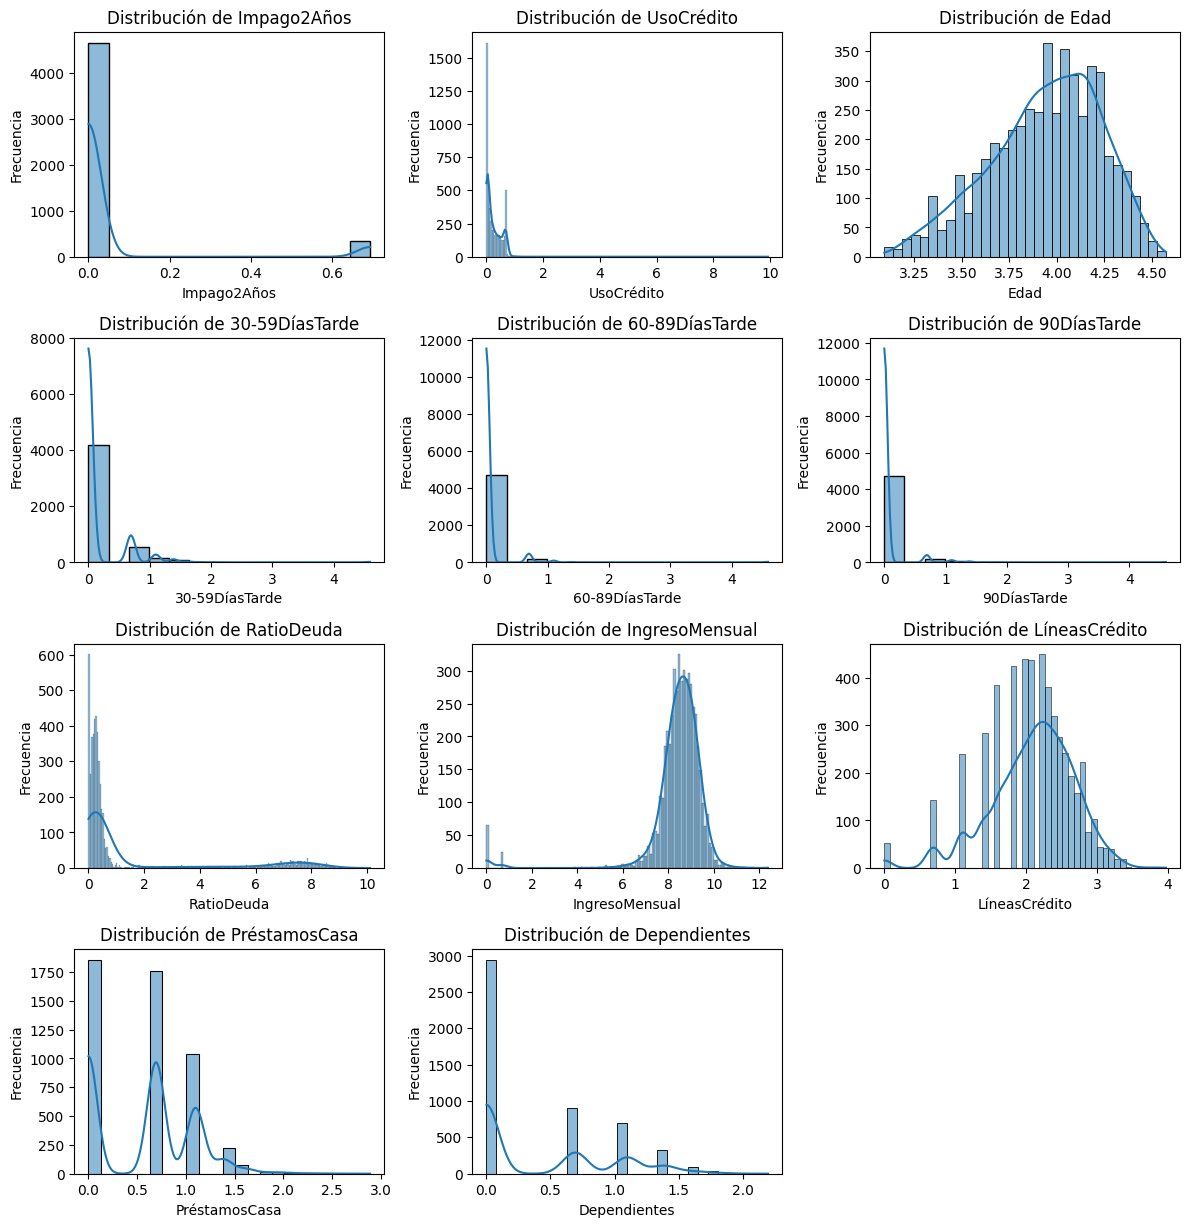

In [ ]:
#@title Histograma de todas las variables (optimizado)

# Seleccionar columnas numéricas con los nombres ajustados
num_columns = df_training_credit.select_dtypes(include=['int64', 'float64']).columns
num_columns = num_columns[1:]  # Excluye la primera columna ('Unnamed: 0')

# Crear una figura de tamaño más manejable
plt.figure(figsize=(12, 15))

# Iterar sobre cada columna numérica y generar un histograma
for i, col in enumerate(num_columns, 1):
    plt.subplot(5, 3, i)

    # Aplicar transformación logarítmica para mejorar visualización de datos extremos
    sns.histplot(np.log1p(df_training_credit[col].dropna().sample(5000)), kde=True)

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

# Ajustar diseño para evitar superposiciones
plt.tight_layout()
plt.show()



# Explicación graficos de barras

Este conjunto de gráficos representa un análisis exploratorio de variables relacionadas con impagos bancarios. A continuación haré una explicación breve:

**Impago2Años:** La mayoría de los clientes no ha tenido impagos en los últimos 2 años. Muy pocos presentan historial de impago.

**UsoCrédito:** El uso del crédito está fuertemente concentrado en valores bajos, aunque hay algunos valores extremos (outliers).

**Edad:** La distribución es bastante simétrica, con la mayoría de los clientes en una edad media (aproximadamente entre 35 y 45 años).

**30-59DíasTarde / 60-89DíasTarde / 90DíasTarde:** Estas variables indican retrasos en pagos. La mayoría de los clientes no presenta retrasos, pero hay una pequeña proporción con demoras considerables.

**RatioDeuda:** Predominan ratios bajos, aunque algunos clientes tienen niveles de deuda significativamente altos.

**IngresoMensual:** Tiene una distribución sesgada a la derecha, con la mayoría ganando entre 6 y 9 (en la escala logarítmica), y algunos valores atípicos.

**LíneasCrédito:** Distribución más balanceada; la mayoría tiene entre 1 y 2 líneas de crédito (en escala log).

**PréstamosCasa:** Variable categórica codificada numéricamente. Se observan tres picos claros, concentrados en valores bajos, la escala va de 0 a 54 habra que normalizar estos datos.

**Dependientes:** La mayoría de los clientes tiene entre 0 y 1 dependiente.

**Conclusión:** Los datos presentan asimetrías, valores atípicos y varias variables con concentración en cero, lo que sugiere una alta proporción de clientes sin problemas financieros graves. Este análisis ayuda a entender la distribución de características clave para predecir impagos.

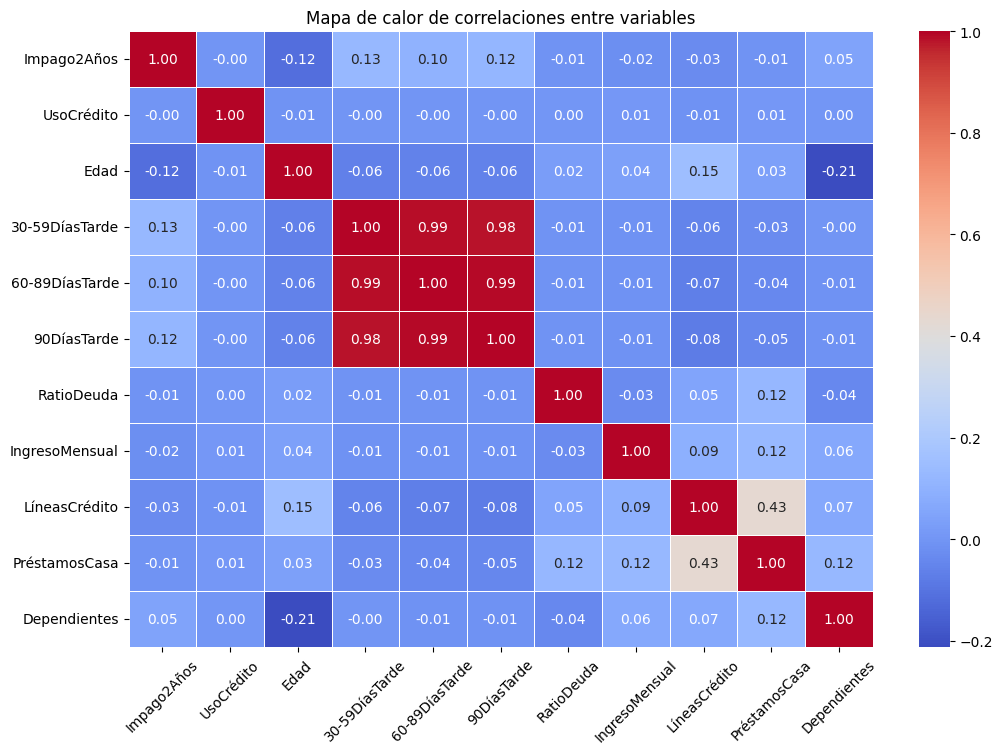

In [ ]:
#@title Mapa de calor de correlaciones

# Seleccionar solo las columnas numéricas, excluyendo 'Unnamed: 0'
num_columns = df_training_credit.select_dtypes(include=['int64', 'float64']).columns
num_columns = num_columns[1:]  # Excluye la primera columna

# Filtrar el DataFrame para contener solo columnas numéricas relevantes
df_corr = df_training_credit[num_columns].corr()

# Crear la figura del mapa de calor
plt.figure(figsize=(12, 8))

# Generar el mapa de calor con Seaborn
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Ajustes visuales
plt.title("Mapa de calor de correlaciones entre variables")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar el mapa de calor
plt.show()

#Explicación Mapa de Calor

El mapa de calor de correlaciones muestra la fuerza y dirección de la relación lineal entre variables del conjunto de datos, en un rango de -1 a 1.

**Puntos principales del mapa de calor**

**1. Impago2Años**

Correlación positiva leve con:

- 30-59DíasTarde (0.13)

- 90DíasTarde (0.12)

- 60-89DíasTarde (0.10)

Esto tiene sentido, ya que los atrasos en pagos están relacionados con el impago.

**Correlaciones muy débiles o nulas con las demás variables.**

**2. Relaciones entre tipos de atraso**
30-59DíasTarde, 60-89DíasTarde, y 90DíasTarde están fuertemente correlacionadas entre sí (~0.98 a 0.99).
Esto indica que si un cliente tiene un tipo de atraso, es probable que también tenga otros.

**3. LíneasCrédito y PréstamosCasa**
Moderada correlación (0.43), posiblemente porque quienes tienen casa también manejan más líneas de crédito.

**4. Edad**
Tiene una correlación negativa moderada con Dependientes (-0.21), lo cual sugiere que personas mayores suelen tener menos dependientes.

Correlaciones bajas con el resto de variables.

**5. Variables financieras**
IngresoMensual, UsoCrédito, y RatioDeuda no tienen correlaciones altas con otras variables, lo que indica independencia lineal.

**Conclusión**
No hay una sola variable fuertemente correlacionada con Impago2Años, lo que indica que el comportamiento de impago probablemente es multifactorial.

Los tipos de atraso en pagos son los mejores indicadores relacionados con impagos.

Este análisis ayuda a identificar posibles variables útiles para modelos predictivos y a reducir redundancias por alta correlación (como entre los tipos de atraso).

In [ ]:
#@title Ver si el archivo contiene outlier
# Elimino la columna Unnamed ya que no aporta valor
df_clean = df_training_credit.drop(columns=['Unnamed: 0'])

# Calcular skewness y kurtosis para todas las columnas
skew_kurt = pd.DataFrame({
    'Skewness': df_clean.skew(),
    'Kurtosis': df_clean.kurtosis()
}).sort_values(by='Kurtosis', ascending=False)

# Mostrar todas
print("Resumen de Skewness y Kurtosis:\n")
print(skew_kurt)

# Opcional: filtrar columnas con valores críticos
outlier_candidates = skew_kurt[(abs(skew_kurt['Skewness']) > 1) | (skew_kurt['Kurtosis'] > 3)]

print("\nColumnas con posible presencia de outliers:\n")
print(outlier_candidates)


Resumen de Skewness y Kurtosis:

                  Skewness      Kurtosis
IngresoMensual  114.040318  19504.705403
UsoCrédito       97.631574  14544.713410
RatioDeuda       95.157793  13734.288858
60-89DíasTarde   23.331743    545.682744
90DíasTarde      23.087345    537.738945
30-59DíasTarde   22.597108    522.376545
PréstamosCasa     3.482484     60.476808
Impago2Años       3.468857     10.033103
LíneasCrédito     1.215314      3.091067
Dependientes      1.588242      3.001657
Edad              0.188995     -0.494669

Columnas con posible presencia de outliers:

                  Skewness      Kurtosis
IngresoMensual  114.040318  19504.705403
UsoCrédito       97.631574  14544.713410
RatioDeuda       95.157793  13734.288858
60-89DíasTarde   23.331743    545.682744
90DíasTarde      23.087345    537.738945
30-59DíasTarde   22.597108    522.376545
PréstamosCasa     3.482484     60.476808
Impago2Años       3.468857     10.033103
LíneasCrédito     1.215314      3.091067
Dependientes      1

#Explicacion Skewness y Kurtosis
- La salida muestra que varias variables tienen valores extremos de Skewness y Kurtosis, lo que sugiere presencia de outliers:

**Conclusión**
Este análisis es útil para:

- Identificar columnas que requieren transformación (log, Box-Cox, winsorizing).
- Detectar y tratar outliers antes de aplicar modelos predictivos.
- Mejorar la normalidad de los datos, lo cual es importante para algoritmos sensibles a la distribución.
- Estas columnas con alto skew/kurtosis deben ser revisadas y posiblemente tratadas antes del modelado.

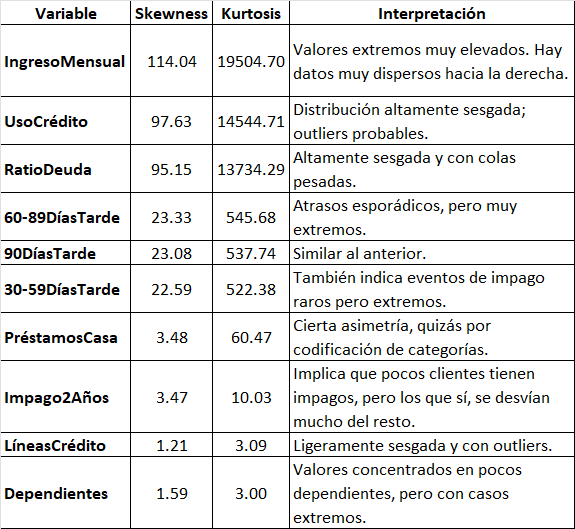

### Skewness y Kurtosis

**Interpretación Skewness**

- Skewness ≈ 0: distribución aproximadamente simétrica.

- Skewness > 0: cola a la derecha más larga → hay valores extremos grandes; la masa de la distribución está concentrada a la izquierda.

- Skewness < 0: cola a la izquierda más larga → valores extremos muy pequeños; masa concentrada a la derecha.

**Interpretación Kurtosis**

- Excess Kurtosis ≈ 0 (Kurtosis ≈ 3): distribución mesocúrtica (parecida a la normal).

- Excess Kurtosis > 0 (leptocúrtica): “pico” más pronunciado y colas más pesadas → más outliers de lo normal.

- Excess Kurtosis < 0 (platicúrtica): distribución más achatada, colas ligeras → menos outliers.

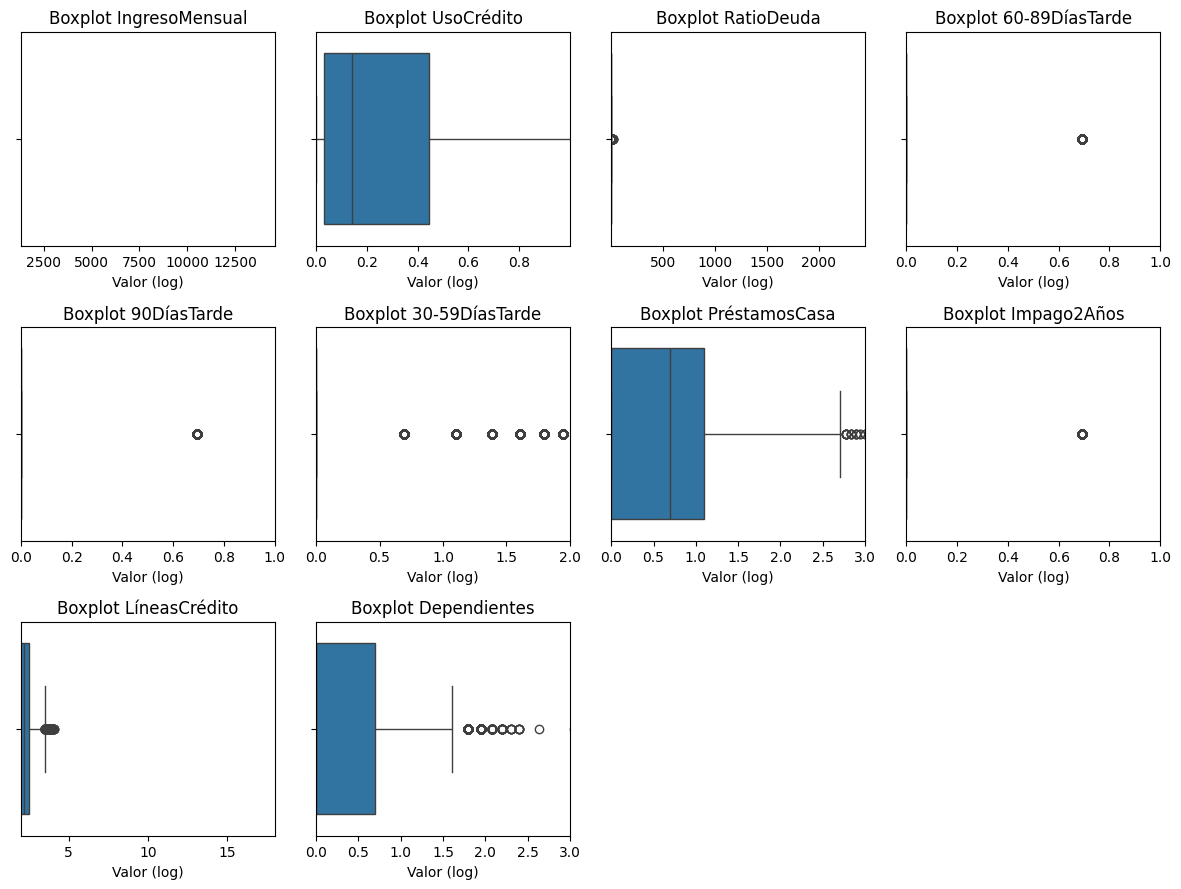

In [ ]:
#@title Gráfico de columnas con outliers según skewness/kurtosis

# Obtener las columnas con posibles outliers desde la tabla de Skewness y Kurtosis
posibles_outlier = outlier_candidates.index.tolist()

# Usar el DataFrame limpio
df = df_clean

# Calcular el número de filas dinámicamente para distribuir los gráficos
num_rows = (len(posibles_outlier) // 4) + 1

# Crear una figura con tamaño ajustado
plt.figure(figsize=(12, num_rows * 3))

# Generar boxplots con escala logarítmica
for i, feature in enumerate(posibles_outlier, 1):
    plt.subplot(num_rows, 4, i)

    # Aplicar transformación logarítmica para reducir el impacto de los valores extremos
    sns.boxplot(x=np.log1p(df[feature]), orient='h')

    # Establecer límites en el eje X correctamente
    plt.xlim(df[feature].quantile(0.05), df[feature].quantile(0.95))

    plt.title(f'Boxplot {feature}')
    plt.xlabel('Valor (log)')

# Ajustar diseño para evitar superposiciones
plt.tight_layout()
plt.show()





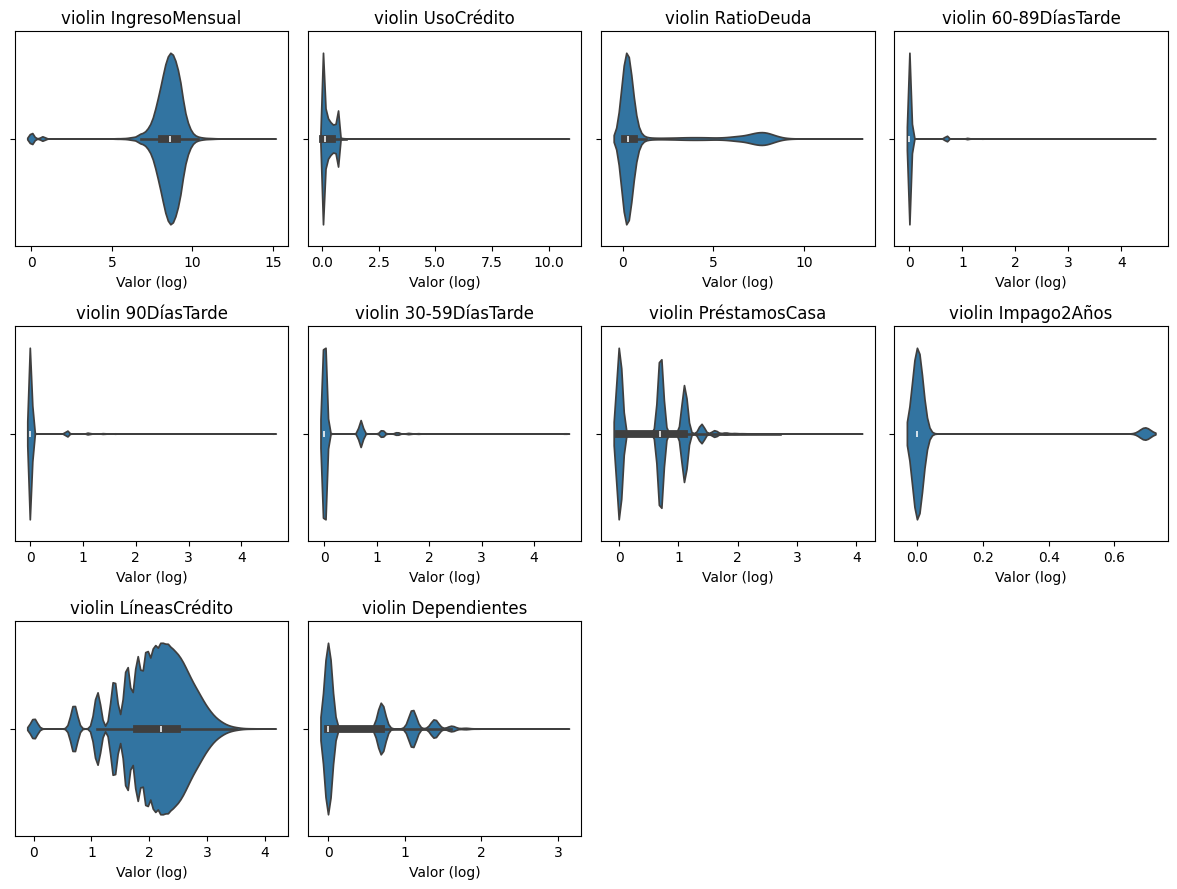

In [ ]:
#@title Grafico de violin para outlier

# Crear una figura con tamaño dinámico
plt.figure(figsize=(12, num_rows * 3))

# Generar violin plots
for i, feature in enumerate(posibles_outlier, 1):
    plt.subplot(num_rows, 4, i)

    # Usar gráfico de violín para mostrar distribución completa de los datos
    sns.violinplot(x=np.log1p(df_clean[feature]), orient='h')

    plt.title(f'violin {feature}')
    plt.xlabel('Valor (log)')

# Ajustar diseño para evitar superposición
plt.tight_layout()
plt.show()


# Explicacion graficos de violin

Los gráficos de violín que permiten visualizar la distribución de los datos de forma más detallada que un histograma o boxplot. En este caso, todos los valores han sido transformados con logaritmo (log) para reducir la asimetría extrema y facilitar la interpretación de datos que originalmente tenían outliers y sesgos importantes como se vio en el análisis de skewness y kurtosis.

**¿Qué muestra cada gráfico de violín?**
- Cada gráfico tiene:
- Una curva en forma de violín que representa la densidad de probabilidad (anchura indica frecuencia).
- Una caja en el centro que muestra el rango intercuartílico (IQR) y la mediana.

**Puntos extremos que pueden representar outliers o valores poco frecuentes.**

**Interpretación por variable (tras log-transformación)**

**IngresoMensual:**
- Curva ancha en el centro: mayoría de los datos están concentrados ahí.
- Algunos puntos alejados a la izquierda y derecha: valores extremos, aunque más suavizados que en la escala original.

**UsoCrédito, RatioDeuda:**
- Distribuciones muy sesgadas hacia valores bajos.
- Después del log, se siguen viendo colas largas a la derecha: aún hay datos dispersos.

**60-89DíasTarde, 90DíasTarde, 30-59DíasTarde**
- Distribuciones altamente concentradas cerca de cero, con colas delgadas a la derecha.
- Esto refleja que la mayoría no tiene atrasos, pero hay pocos casos con grandes demoras.

**PréstamosCasa rango de 0 a 54**
- Distribución multimodal: posiblemente variable categórica codificada como numérica.
- Varios picos indican distintos grupos.

**Impago2Años distribucion 0 No - 1 Si**
- También fuertemente concentrada cerca de cero.
- Muy pocos valores cercanos al 1 (indicando impago), lo cual es esperable.

**LíneasCrédito rango de 0 a 58**
- Distribución compleja: distintos grupos de clientes con distinto acceso a crédito.

**Dependientes rango de 0 a 20**
- Muchos con 0 o pocos dependientes.
- Algunos picos a la derecha: familias más grandes, menos frecuentes.

**Conclusiones Generales**
- La transformación logarítmica ayuda a reducir la asimetría y visualizar mejor la estructura de los datos.
- La mayoría de las variables están sesgadas hacia valores bajos, con pocos casos extremos.
- Variables como DíasTarde e Impago2Años reflejan bien un fenómeno de impago poco común pero significativo.
- Algunas variables, como PréstamosCasa, podrían necesitar codificación categórica adecuada.

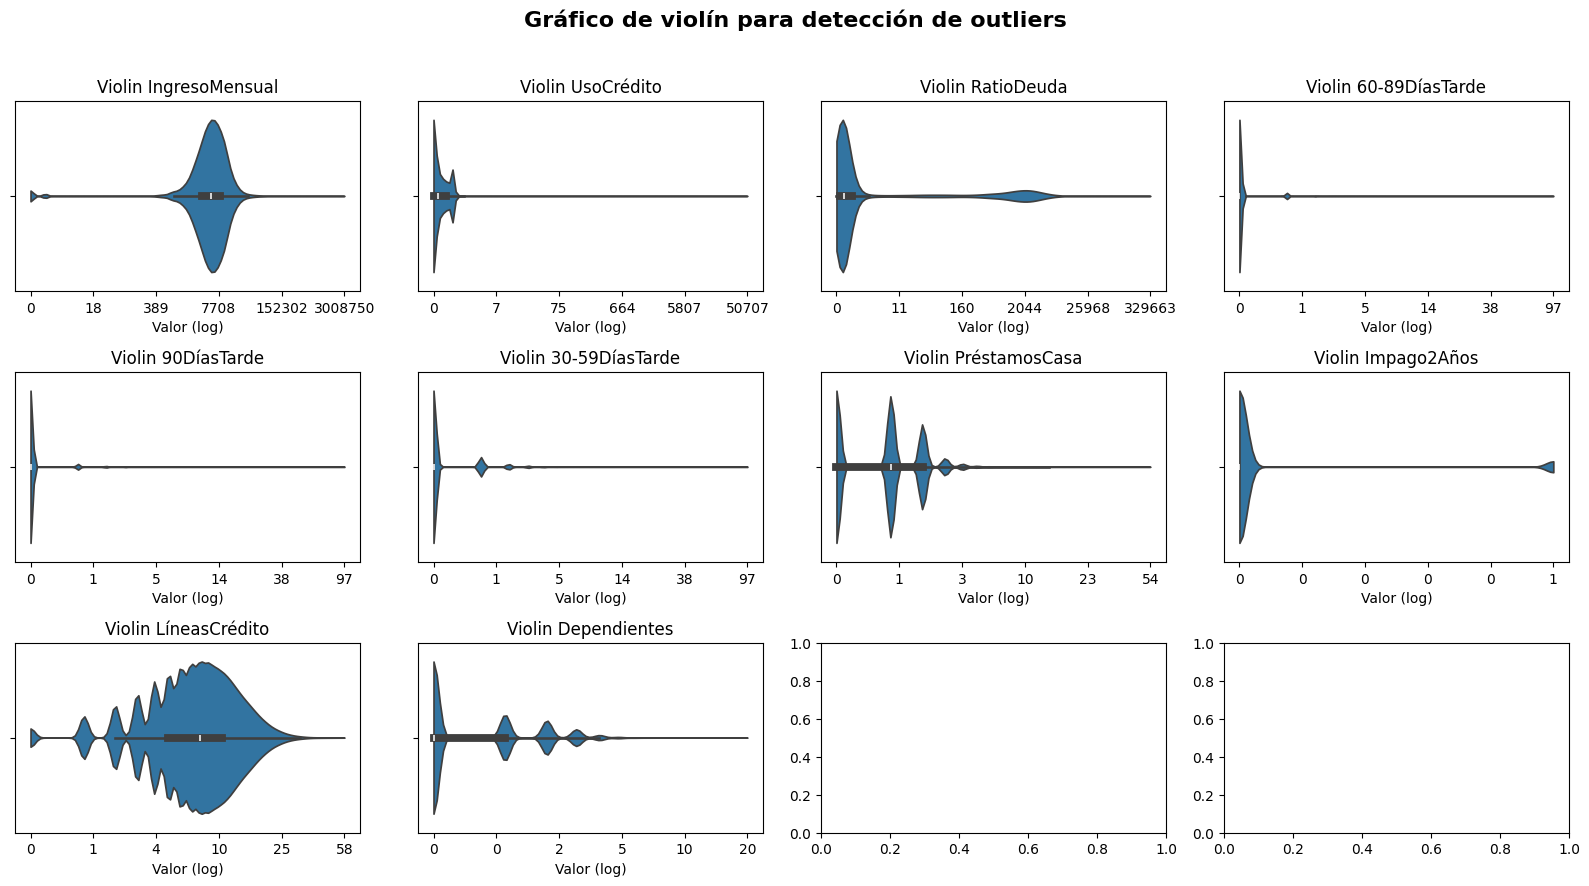

In [ ]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

# Definir las columnas con posibles outliers
# Estas variables han mostrado valores extremos en Skewness y Kurtosis
posibles_outlier = ["IngresoMensual", "UsoCrédito", "RatioDeuda", "60-89DíasTarde",
                    "90DíasTarde", "30-59DíasTarde", "PréstamosCasa", "Impago2Años",
                    "LíneasCrédito", "Dependientes"]

# Calcular el número de filas necesarias para organizar los gráficos
# Esto ajusta la cantidad de filas dinámicamente según la cantidad de variables
num_rows = (len(posibles_outlier) + 3) // 4

# Crear una figura con tamaño adecuado para visualizar mejor los gráficos
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, num_rows * 3))

# Agregar un título general a la figura para dar contexto
fig.suptitle("Gráfico de violín para detección de outliers", fontsize=16, fontweight="bold")

# Iterar sobre cada variable y generar gráficos de violín
for i, feature in enumerate(posibles_outlier):
    row, col = divmod(i, 4)  # Calcular la posición de la variable en la cuadrícula

    # Crear un gráfico de violín con escala logarítmica para mejorar la visualización de extremos
    # La transformación logarítmica reduce el impacto de valores extremadamente grandes
    sns.violinplot(x=np.log1p(df_clean[feature]), ax=axes[row, col], orient='h', cut=0)

    # Agregar título a cada gráfico para identificar la variable
    axes[row, col].set_title(f'Violin {feature}', fontsize=12)

    # Etiqueta del eje X para mayor claridad
    axes[row, col].set_xlabel("Valor (log)", fontsize=10)

    # Convertir valores logarítmicos a escala original en el eje X para interpretación
    # Esto ayuda a visualizar los valores en su escala real en lugar de logarítmica
    ticks_log = np.linspace(np.log1p(df_clean[feature].min()), np.log1p(df_clean[feature].max()), 6)
    ticks_real = np.expm1(ticks_log)  # Aplicar transformación inversa para mostrar valores reales
    axes[row, col].set_xticks(ticks_log)
    axes[row, col].set_xticklabels([f"{int(tick)}" for tick in ticks_real])

# Ajustar diseño para evitar superposición y mejorar la legibilidad de los gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el espacio alrededor del título principal
plt.show()


In [ ]:
#@title **EDA Automático con ydata-profiling**

# Instalar la librería (si no está instalada)
#!pip install ydata-profiling

# Importar la librería
#from ydata_profiling import ProfileReport

# Eliminamos las primeras columnas irrelevantes (RowNumber, CustomerId, Unnamed: 0)
df_filtrado = df_training_credit.iloc[:, 1:]  # Excluye la primera columna

# Creamos el informe de análisis exploratorio con un título descriptivo
profile = ProfileReport(df_filtrado, title="Reporte de Análisis Exploratorio de Datos", explorative=True)

# Mostramos el informe dentro de Google Colab
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:01<00:00,  6.12it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#**Resumen EDA Credit failure prediction**
**1. Información General**
- Total filas: 150.000
- Variables: 11 relevantes (más una columna Unnamed innecesaria)
- Duplicados detectados por df.duplicated(): 609
- Celdas con datos faltantes: 33,655 (2.0%)

**2. Variable Objetivo: Impago2Años**
- Tipo: Binaria (0 = No impago, 1 = Sí impago)
- Distribución:
  - No: 139,974 (93.3%)
  - Sí: 10,026 (6.7%)
Datos muy desbalanceados, habrá que aplicar SMOTE u otra técnica de balanceo.

**3. Limpieza de Datos**
- Eliminar columna 'Unnamed: 0'
- Asignar nombre corto a las columnas
- Edad < 18: eliminar (solo 1 registro) y Edad =0
- Nulos:
  - IngresoMensual: 29,731 nulos (19.8%): imputar con media
  - Dependientes: 3,924 nulos (2.6%): imputar con moda
- Crear Grupo de Edad.
- Eliminar duplicados: 609 registros

**4. Variables con Outliers (alto sesgo y curtosis)**
- UsoCrédito, IngresoMensual, RatioDeuda: extremadamente sesgadas
- 30-59DíasTarde, 60-89DíasTarde, 90DíasTarde: distribuciones concentradas en 0, algunos máximos en 98
- Acción: aplicar Winsorización o log-transformación

**5. Análisis Univariado**
- Edad: mediana ≈ 52. Discretizar por rangos (18-29, 30-39, etc.)
- PréstamosCasa: Rango de 0 a 54, a partir del 3 el porcentaje es bajo. Valorar la recodificación a categórica.
- Dependientes: mayoría = 0
- LíneasCrédito: media = 8.4, outliers > 20

**6. Correlación (Heatmap)**
- Impago2Años correlaciona levemente con:
  - 30-59DíasTarde: +0.13
  - 90DíasTarde: +0.12
  - 60-89DíasTarde: +0.10
- Alta correlación interna entre variables de mora (~0.98)
- Edad y Dependientes: correlación negativa (-0.21)
- RatioDeuda, IngresoMensual, UsoCrédito → poca correlación lineal

**7. Distribución de Ceros**
- 30-59DíasTarde: 84% ceros
- 60-89DíasTarde: 94.9% ceros
- 90DíasTarde: 94.4% ceros
- Dependientes: 57.9% ceros
- Otros: IngresoMensual, RatioDeuda, UsoCrédito también presentan ceros

**8. Visualización (Gráficos de violín con log)**
- Permiten ver la distribución interna y suavizan la asimetría
- Mostraron que los valores están concentrados en rangos bajos
- Algunos grupos son multimodales (PréstamosCasa, LíneasCrédito)

**9. Recomendaciones para Preprocesamiento**
- Eliminar columna Unnamed y duplicados
- Imputar nulos: media (IngresoMensual), moda (Dependientes)
- Winsorización o log para reducir sesgo
- Discretizar Edad
- Codificar adecuadamente variables como PréstamosCasa
- Aplicar SMOTE u otra técnica de balanceo
- Validación estratificada en modelos